Experiment 5 Machine learning


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loan Approval Dataset:
    Age    Income  Credit Score  Loan Amount  Employment Status  \
0  53.0       NaN         741.0      21572.0                1.0   
1  20.0   83010.0         542.0       9135.0                0.0   
2   NaN   27160.0         693.0      12963.0                1.0   
3  42.0       NaN         783.0          NaN                1.0   
4  61.0  147390.0         566.0      13207.0                0.0   

   Marital Status  Loan Approval  
0             1.0            1.0  
1             0.0            0.0  
2             NaN            0.0  
3             1.0            0.0  
4             1.0            1.0  

Summary Statistics:
               Age         Income  Credit Score   Loan Amount  \
count  458.000000     454.000000    454.000000    459.000000   
mean    41.288210   83439.526432    584.438326  26497.673203   
std     13.706677   3

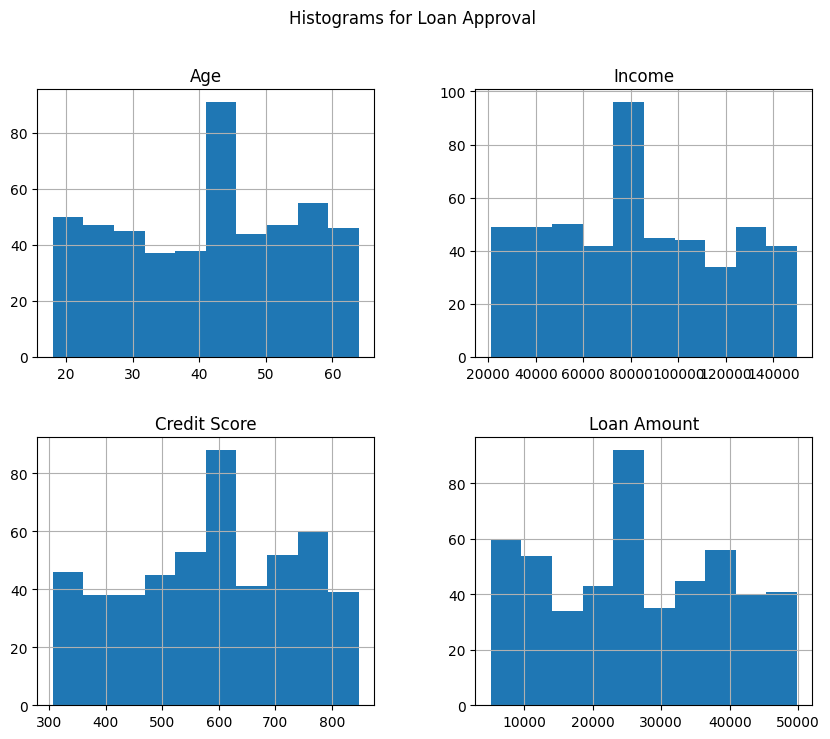

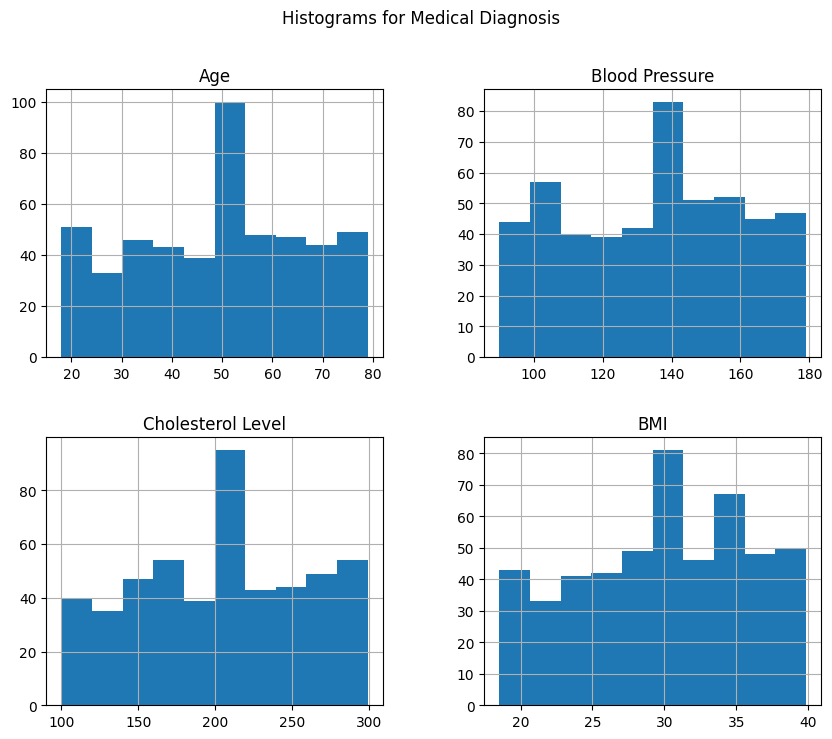

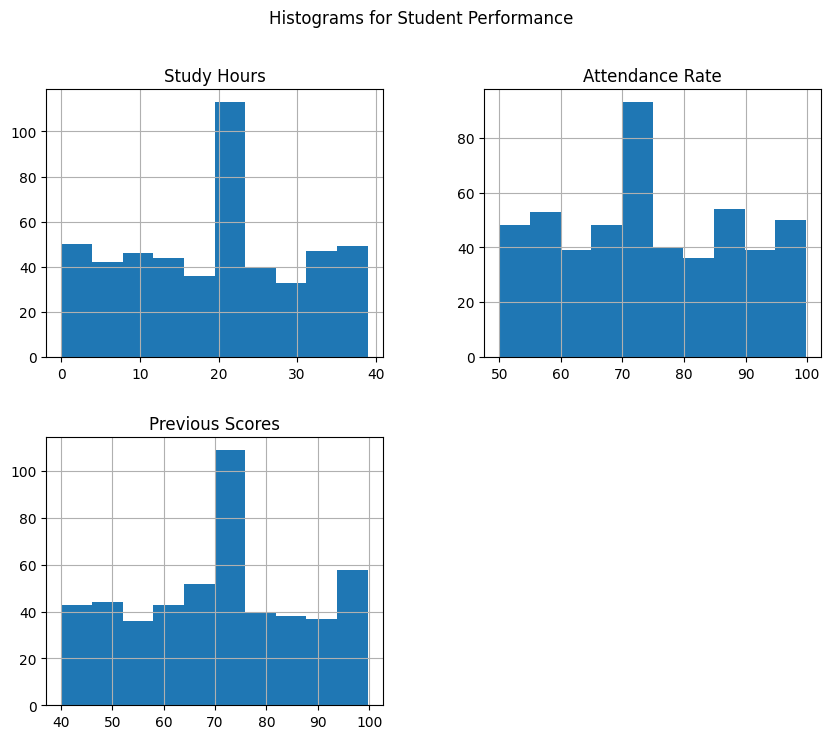

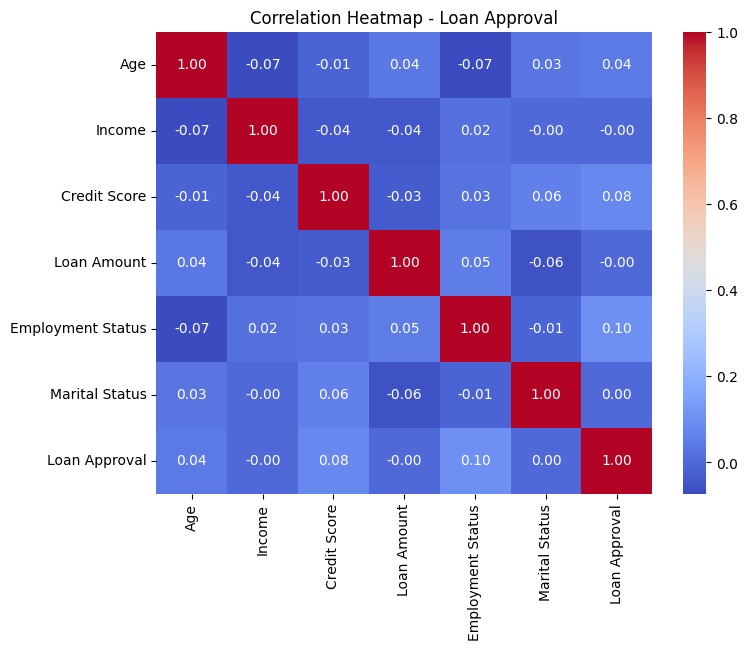

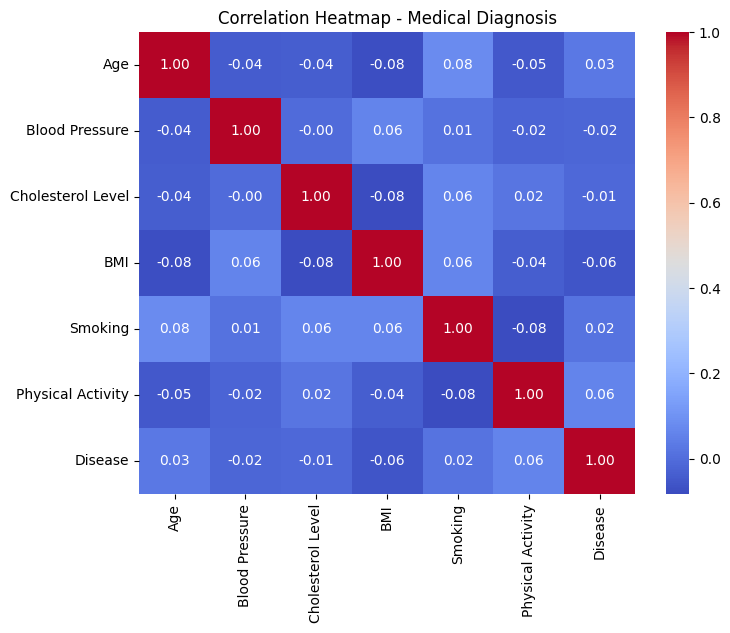

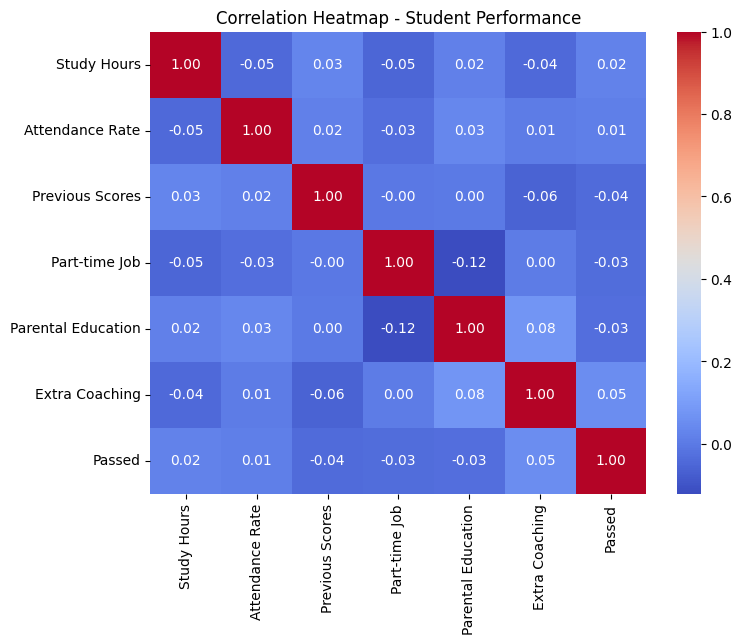

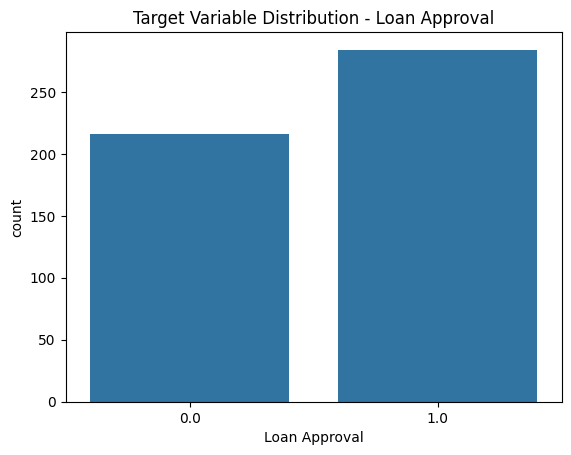

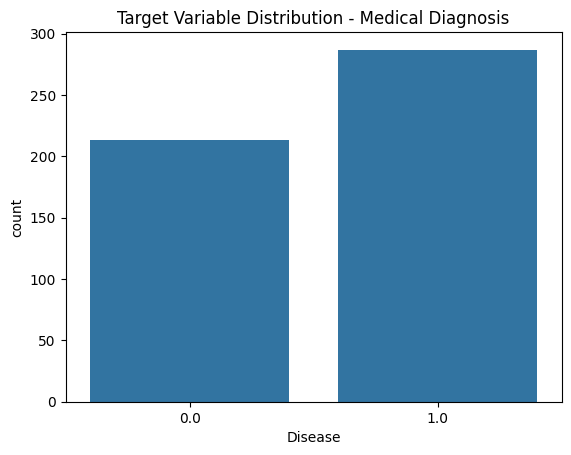

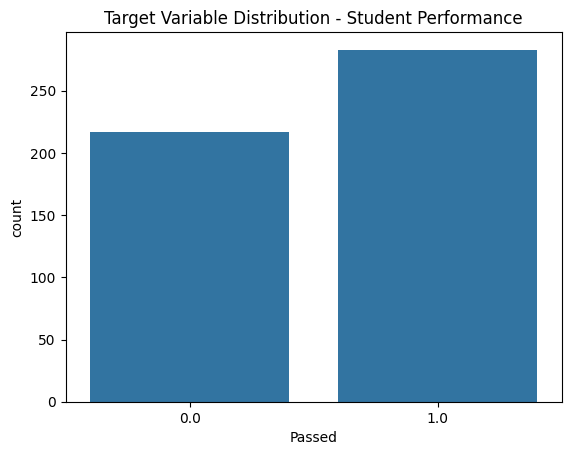

Loan Approval Metrics (Accuracy, Precision, Recall, F1 Score, ROC-AUC): (0.62, 0.627906976744186, 0.9, 0.7397260273972602, 0.5904166666666667)
Medical Diagnosis Metrics (Accuracy, Precision, Recall, F1 Score, ROC-AUC): (0.56, 0.6282051282051282, 0.765625, 0.6901408450704225, 0.43359375000000006)
Student Performance Metrics (Accuracy, Precision, Recall, F1 Score, ROC-AUC): (0.55, 0.5463917525773195, 0.9814814814814815, 0.7019867549668873, 0.5281803542673107)

Comparison of Model Performance Across Datasets:
       Metric  Loan Approval  Medical Diagnosis  Student Performance
0   Accuracy       0.620000           0.560000             0.550000
1  Precision       0.627907           0.628205             0.546392
2     Recall       0.900000           0.765625             0.981481
3   F1 Score       0.739726           0.690141             0.701987
4    ROC-AUC       0.590417           0.433594             0.528180


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


file_path = '/content/drive/My Drive/binary_classification_datasets.xlsx'
excel_file = pd.ExcelFile(file_path)


loan_df = pd.read_excel(excel_file, sheet_name='Loan Approval')
medical_df = pd.read_excel(excel_file, sheet_name='Medical Diagnosis')
student_df = pd.read_excel(excel_file, sheet_name='Student Performance')


def explore_data(df):
    print(df.head())
    print("\nSummary Statistics:\n", df.describe())
    print("\nMissing Values:\n", df.isnull().sum())

print("Loan Approval Dataset:")
explore_data(loan_df)

print("\nMedical Diagnosis Dataset:")
explore_data(medical_df)

print("\nStudent Performance Dataset:")
explore_data(student_df)

def handle_missing_data(df):

    df.fillna(df.median(), inplace=True)
    return df

loan_df = handle_missing_data(loan_df)
medical_df = handle_missing_data(medical_df)
student_df = handle_missing_data(student_df)

def preprocess_data(df, target_column, numeric_columns):

    X = df.drop(target_column, axis=1)
    y = df[target_column]

    scaler = StandardScaler()
    X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

    return train_test_split(X, y, test_size=0.2, random_state=42)

loan_numeric_columns = ['Age', 'Income', 'Credit Score', 'Loan Amount']
X_train_loan, X_test_loan, y_train_loan, y_test_loan = preprocess_data(loan_df, 'Loan Approval', loan_numeric_columns)

medical_numeric_columns = ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI']
X_train_medical, X_test_medical, y_train_medical, y_test_medical = preprocess_data(medical_df, 'Disease', medical_numeric_columns)

student_numeric_columns = ['Study Hours', 'Attendance Rate', 'Previous Scores']
X_train_student, X_test_student, y_train_student, y_test_student = preprocess_data(student_df, 'Passed', student_numeric_columns)

def plot_histograms(df, numeric_columns, title):
    df[numeric_columns].hist(figsize=(10, 8))
    plt.suptitle(f"Histograms for {title}")
    plt.show()

plot_histograms(loan_df, loan_numeric_columns, "Loan Approval")
plot_histograms(medical_df, medical_numeric_columns, "Medical Diagnosis")
plot_histograms(student_df, student_numeric_columns, "Student Performance")

def plot_heatmap(df, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Heatmap - {title}")
    plt.show()

plot_heatmap(loan_df, "Loan Approval")
plot_heatmap(medical_df, "Medical Diagnosis")
plot_heatmap(student_df, "Student Performance")

def plot_target_distribution(df, target_column, title):
    sns.countplot(x=target_column, data=df)
    plt.title(f"Target Variable Distribution - {title}")
    plt.show()

plot_target_distribution(loan_df, 'Loan Approval', "Loan Approval")
plot_target_distribution(medical_df, 'Disease', "Medical Diagnosis")
plot_target_distribution(student_df, 'Passed', "Student Performance")

def train_and_evaluate_model(X_train, y_train, X_test, y_test):

    model = LogisticRegression()
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    return accuracy, precision, recall, f1, roc_auc

loan_metrics = train_and_evaluate_model(X_train_loan, y_train_loan, X_test_loan, y_test_loan)
medical_metrics = train_and_evaluate_model(X_train_medical, y_train_medical, X_test_medical, y_test_medical)
student_metrics = train_and_evaluate_model(X_train_student, y_train_student, X_test_student, y_test_student)

print("Loan Approval Metrics (Accuracy, Precision, Recall, F1 Score, ROC-AUC):", loan_metrics)
print("Medical Diagnosis Metrics (Accuracy, Precision, Recall, F1 Score, ROC-AUC):", medical_metrics)
print("Student Performance Metrics (Accuracy, Precision, Recall, F1 Score, ROC-AUC):", student_metrics)


results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC'],
    'Loan Approval': loan_metrics,
    'Medical Diagnosis': medical_metrics,
    'Student Performance': student_metrics
})
print("\nComparison of Model Performance Across Datasets:\n", results)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Import necessary libraries
import pandas as pd

file_path = '/content/drive/My Drive/binary_classification_datasets.xlsx'

excel_file = pd.ExcelFile(file_path)

print(excel_file.sheet_names)https://cl1p.net/mllab7

loan_df = pd.read_excel(file_path, sheet_name='Loan Approval')
medical_df = pd.read_excel(file_path, sheet_name='Medical Diagnosis')
student_df = pd.read_excel(file_path, sheet_name='Student Performance')

print("Loan Approval Dataset:")
print(loan_df.head())

print("\nMedical Diagnosis Dataset:")
print(medical_df.head())

print("\nStudent Performance Dataset:")
print(student_df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Loan Approval', 'Medical Diagnosis', 'Student Performance']
Loan Approval Dataset:
    Age    Income  Credit Score  Loan Amount  Employment Status  \
0  53.0       NaN         741.0      21572.0                1.0   
1  20.0   83010.0         542.0       9135.0                0.0   
2   NaN   27160.0         693.0      12963.0                1.0   
3  42.0       NaN         783.0          NaN                1.0   
4  61.0  147390.0         566.0      13207.0                0.0   

   Marital Status  Loan Approval  
0             1.0            1.0  
1             0.0            0.0  
2             NaN            0.0  
3             1.0            0.0  
4             1.0            1.0  

Medical Diagnosis Dataset:
    Age  Blood Pressure  Cholesterol Level        BMI  Smoking  \
0  31.0            96.0              213.0  38.350882      1.0   
1  25.0      